# 2	พื้นฐานการหาค่าเหมาะที่สุด

ในบทนี้จะกล่าวถึงวิธีการพื้นฐานในการหาค่าเหมาะที่สุด โดยเริ่มจากแนวคิดเบื้องต้นสำหรับปัญหาที่ไม่มีเงื่อนไขบังคับ เป้าหมายคือลดค่าของฟังก์ชันวัตถุประสงค์จนกระทั่งได้ค่าต่ำที่สุด  โดยอาจะเป็นค่าแบบวงกว้าง ค่าเฉพาะที่ หรือไม่มีขอบเขต (เข้าสู่อนันต์ด้านลบ) ขึ้นกับว่าฟังก์ชันเป็นแบบใด ความซับซ้อนของอัลกอริทึมจะเพิ่มขึ้นตามลำดับเมื่อเพิ่มเงื่อนไขบังคับแบบสมการและอสมการ การนำเสนอในส่วนนี้จะยึดแนวทางตามเนื้อหาในรายวิชา [1] เพียงแต่เปลี่ยนแปลงรายละเอียดในตัวอย่าง และใช้ภาษาไพทอนแทนจูเลีย

### 2.1 อัลกอริทึมสำหรับหาคำตอบเหมาะที่สุด

วิธีการหาคำตอบสำหรับปัญหาการหาค่าเหมาะที่สุดสามารถทำได้หลากหลาย และอาจเลือกตัวหาคำตอบที่เหมาะสมตามประเภทของโจทย์ปัญหา แม้ในปัจจุบันยังมีผู้คิดค้นวิธีการใหม่ขึ้นมาอยู่ตลอด กล่าวได้ว่าเป็นงานวิจัยเปิด แนวทางในบทนี้เพียงนำเสนอวิธีการพื้นฐานที่ช่วยให้เข้าใจหลักการของการหาค่าเหมาะที่สุดเท่านั้น

สมมุติว่าเวลานี้เราไม่มีความรู้เกี่ยวกับการหาค่าเหมาะที่สุดเลย โจทย์กำหนดให้ฟังก์ชันมูลค่า $y=f(x)$ มาให้และถามว่าค่า $x$ ที่ทำให้ $y$ มีค่าต่ำสุดคือเท่าใด วิธีการแบบตรงไปตรงมาที่คิดได้คือกำหนดค่าตัวอย่าง $x$ เป็นเวกเตอร์ในช่วงหนึ่งแล้วแทนค่าลงในฟังก์ชัน อาจพล็อตเป็นกราฟหรือเขียนโปรแกรมหาค่าต่ำสุดในเวกเตอร์เอาต์พุต  วิธีการนี้มีข้อด้อยที่ทำให้ไม่สามารถใช้งานได้ดีในทางปฏิบัติ เช่น

* จะแน่ใจอย่างไรว่าย่านที่ทดสอบกว้างเพียงพอ และจำนวนจุดตัวอย่างละเอียดเพียงพอ เราอาจได้ค่าที่คลาดเคลื่อนจากคำตอบจริง
* ในกรณีตัวแปรตัดสินใจมีจำนวนมากและฟังก์ชันมีความซับซ้อน การคำนวณจะใช้เวลามากทำให้ไม่สามารถทำงานได้แบบเรียลไทม์
* ในบางกรณีฟังก์ชันอาจเป็นการประมาณค่าที่ไม่อยู่ในรูปปิด หรือมีการเปลี่ยนแปลงได้ระหว่างการทำงาน

ดังนั้นเราต้องการอัลกอริทึมรูปแบบอื่นที่มิใช่การแทนค่าฟังก์ชัน สามารถประมวลผลได้เร็วเพียงพอสำหรับควบคุมระบบที่ตอบสนองเร็วเช่นหุ่นยนต์ ประยุกต์ใช้กับงานได้หลากหลายเช่นการเรียนรู้ของเครื่องที่อาจมีตัวแปรเป็นหลักล้านตัว

#### 2.1.1 เงื่อนไขจำเป็นสำหรับค่าต่ำสุด 

พื้นฐานการหาค่าต่ำสุดของฟังก์ชันโดยอาศัยหลักการของแคลคูลัสได้มีการประยุกต์ใช้ในหลายสาขาวิชา เช่น วิศวกรรมศาสตร์ วิทยาศาสตร์ เศรษฐศาสตร์ 

**ตัวอย่าง 2.1** พิจารณาฟังก์ชัน
$$
f(x) = x^4 + x^3 - 2x^2 - 0.5x \tag{2.1}
$$

เขียนโค้ดไพทอนเพื่อสร้างฟังก์ชัน (2.1)


In [1]:
def f(x):
    return x**4 + x**3 -2*x**2 - 0.5*x   

พล็อตค่าในช่วง [-2, 1.5] ได้ดังรูปที่ 2.1

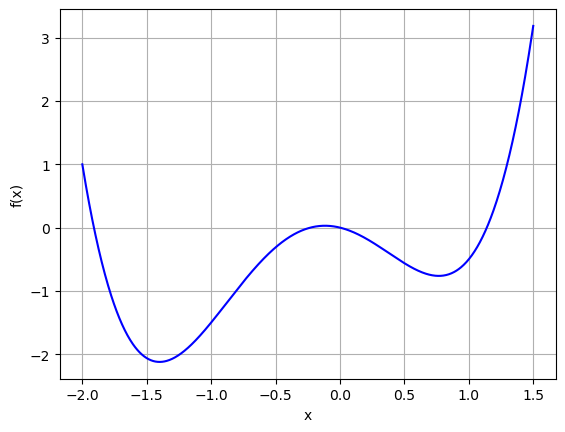

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2, 1.5, 1000)
y = f(x)
plt.plot(x,y,'b-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()


รูปที่ 2.1 กราฟของฟังก์ชัน (2.1) ในช่วง [-2, 1.5]

จากกราฟเมื่ออ่านค่าโดยสายตา มีจุดต่ำสุดที่ค่า x ประมาณ -1.4 ซึ่ง ณ จุดนี้ ความชันของกราฟเท่ากับศูนย์ ดังนั้นเงื่อนไขจำเป็นในกรณีทั่วไปสำหรับค่าต่ำสุดคือค่าอนุพันธ์

$$
\frac{\partial f(x)}{\partial x} = 0 \tag{2.2}
$$



เหตุผลที่ (2.2) เป็นเพียงเงื่อนไขจำเป็นแต่ยังไม่เพียงพอพิจารณาได้จากกราฟในรูปที่ 2.1  จะเห็นว่ามี 3 ตำแหน่งที่ (2.2) เป็นจริง แต่มีเพียงตำแหน่งเดียวที่เป็นค่าต่ำสุดวงกว้าง ส่วนที่ค่า $x$ ประมาณ 0.8 คือค่าต่ำสุดเฉพาะที่ และ $x$ ประมาณ -0.1 เป็นค่ายอดของเส้นโค้งบริเวณส่วนกลางของกราฟ  
จากหลักการของแคลคูลัส เราต้องการเงื่อนไขอีกข้อหนึ่งสำหรับค่าต่ำสุด (ไม่จำเป็นต้องเป็นแบบวงกว้าง) คืออนุพันธ์อันดับสองต้องมีค่าเป็นบวก ซึ่งจะขยายหลักการนี้ให้ครอบคลุมกรณีทั่วไป

### 2.1.2 การหาค่ารากโดยวิธีนิวตัน

ในการหาจุดที่ค่าความชันเป็นศูนย์ สามารถประยุกต์ใช้ วิธีนิวตัน (Newton’s method) 
ที่ใช้ในการวิเคราะห์เชิงเลขสำหรับหาค่ารากของฟังก์ชันจำนวนจริง ซึ่งก็คือจุดที่ฟังก์ชันมีค่าเป็นศูนย์ 
นิยามเชิงคณิตศาสตร์คือ สำหรับฟังก์ชัน $f(x)$ หาค่าของ $x^*$ ที่ทำให้ $f(x^*) = 0$ 

ในบริบทของระบบควบคุมที่เป็นเนื้อหาหลักของหนังสือ อาจเปรียบเทียบได้กับจุดสมดุล (equilibrium) ของพลวัตในระบบเวลาต่อเนื่อง หรือหากพิจารณาในระบบเวลาวิยุต (discrete-time) จุดสมดุลที่เสถียรเรียกว่า จุดตรึง (fixed point) ที่ทำให้ $f(x*) = x*$  สังเกตว่าทั้งสองรูปแบบมีความสัมพันธ์กัน เพราะเราสามารถแปลงปัญหาจุดตรึงเป็นการหาค่ารากได้โดยเขียนอยู๋ในรูป $f(x*) - x*  = 0$

วิธีการของนิวตันเริ่มต้นจากการประมาณค่าเชิงเส้นฟังก์ชัน  $f(x)$

$$
f(x + \Delta x) \approx f(x) = f(x) + \frac{\partial f(x)}{\partial x} \Delta x \tag{2.3}
$$

ตั้งให้การประมาณค่านี้เท่ากับศูนย์ 

$$
f(x) + \frac{\partial f(x)}{\partial x} \Delta x = 0 \tag{2.4}
$$

หาคำตอบ $\Delta x$ ได้ดังนี้

$$
 \Delta x = -\left(\frac{\partial f(x)}{\partial x}\right)^{-1}f(x) \tag{2.5}
$$

สมการ (2.5) คือหัวใจสำคัญของอัลกอริทึมหาค่ารากโดยวิธีนิวตัน มีโครงสร้างดังนี้
* คาดเดาค่าเริ่มต้น $x$
* คำนวณขั้นการเปลี่ยนค่า $\Delta x$ จาก (2.5)
* ปรับค่า $x \leftarrow x + \Delta x$
* วนซ้ำจนลู่เข้า คือค่า $f(x)$ เข้าสู่ศูนย์โดยมีค่าผิดพลาดอยู่ในพิกัดที่ต้องการ 

**ตัวอย่าง 2.2** พิจารณาพลวัตของลูกตุ้มในรูปที่ 2.2 เมื่อไม่มีอินพุต สามารถบรรยายโดยสมการการเคลื่อนที่ดังนี้

$$
ml^2 \ddot(\theta) + mgl sin(\theta) = 0 \tag{2.6}
$$

![Fig2.2](https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/fig2_2.png)

รูปที่ 2.2 ลูกตุ้มสำหรับตัวอย่าง 2.2

เมื่อกำหนดสถานะ $x = [\theta \;\; \dot{\theta}]^T$ จะเขียนอยู่ในรูปเมทริกซ์ได้เป็น

$$
\dot x = \left[\begin{array}{c}
\dot{\theta} \\
\ddot{\theta}
\end{array} \right] =
\left[ \begin{array}{c}
\dot{\theta} \\
\frac{-g}{l}sin(\theta) 
\end{array} \right] \tag{2.7}
$$

หากต้องการจำลองพลวัตของลูกตุ้มบนคอมพิวเตอร์ จะต้องแปลงระบบให้อยู่ในรูปเวลาวิยุตซึ่งทำได้หลายวิธี วิธีการหนึ่งที่จะแสดงในตัวอย่างนี้โดยการหาค่ารากหรือวิธีจุดตรึงเรียกว่า ออยเลอร์ย้อนหลัง (backward Euler) เขียนได้ดังนี้

$$
x_{k+1} = x_k+hf(x_{k+1}) \tag{2.8}
$$

โดย $h$ คือค่าขั้นเวลา (time step) สังเกตว่าค่าของสถานะ $x_{k+1}$ ใน (2.5) ขึ้นกับ $f(x_{k+1})$  ซึ่งไม่สามารถคำนวณได้โดยตรง แต่เมื่อจัดรูปใหม่เป็น

$$
x_k + hf(x_{k+1})-x_{k+1}=0 \tag{2.9}
$$

จะกลายเป็นโจทย์ที่สามารถใช้วิธีหาค่ารากหรือวิธีจุดตรึงได้ จะใช้ทั้งสองวิธีเพื่อเปรียบเทียบกัน 

นำเข้าแพ็กเกจที่ต้องการใช้ ที่เพิ่มเติมจากเดิมคือ norm  จาก numpy.linalg  สำหรับคำนวณค่าแตกต่างและ solve สำหรับการหาคำตอบที่ต้องทำเมทริกซ์ผกผัน (โดย solve(A,B) เปรียบได้กับ A\B ในภาษาอื่นเช่นจูเลีย) และสุดท้ายคือ forwarddiff  จาก pydrake สำหรับคำนวณอนุพันธ์อัตโนมัติ ซึ่งต้องติดตั้งซอฟต์แวร์ Drake ก่อนจึงสามารถเรียกใช้ได้



In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy.linalg import norm, solve
from pydrake import forwarddiff


สร้างฟังก์ชันจำลองพลวัตของลูกตุ้ม โดยกำหนดความยาวก้านต่อเท่ากับ 1.0 เมตร

In [4]:
def pendulum_dynamics(x):
    l = 1.0
    g = 9.81
    theta = x[0]
    theta_dot = x[1]
    theta_ddot = -(g/l)*np.sin(theta)
    return np.array([theta_dot,theta_ddot]) 

เริ่มจากวิธีการจุดตรึง สร้างฟังก์ชันสำหรับแต่ละขั้นของออยเลอร์ย้อนหลัง

In [5]:
def backward_euler_step_fixed_point(func, x0, h):
    xn = x0
    e = [norm(x0 + h*func(xn) - xn)]
    while e[-1] > 1e-8:
        xn = x0 + h*func(xn)
        e.append(norm(x0 + h*func(xn) - xn))    
    return xn, e

จะเห็นว่าในแต่ละขั้น ฟังก์ชันมีการคำนวณค่าแตกต่างระหว่างด้านซ้ายและขวาใน (2.8) และวนซ้ำจนกว่าค่าแตกต่างจะน้อยกว่าพิกัดที่กำหนด เช่น 1e-8 หลังจากนิยามฟังก์ชันขั้นแล้ว สร้างฟังก์ชันรวมสำหรับการจำลองในช่วงเวลาที่กำหนดโดยเวลาสิ้นสุด  Tf

In [11]:
def backward_euler_fixed_point(func, x0, Tf, h):
    t = np.arange(0,Tf,h)
    x_hist = np.zeros((len(x0),len(t)))
    x_hist[:,0] = x0
    for k in range(len(t)-1):
        x_hist[:,k+1],e = backward_euler_step_fixed_point(func,x_hist[:,k],h)
    
    return x_hist, t

สำหรับวิธีการนิวตัน มีการปรับแต่งโค้ดเพิ่มเติมเล็กน้อยเพื่อความสะดวก โดยเขียนฟังก์ชันห่อหุ้มพลวัตของลูกตุ้มเป็นดังนี้

In [7]:
def pendulum_dynamics_wrapper(x):
    global _x0, _h
    return _x0 + _h*pendulum_dynamics(x) - x

**หมายเหตุ :** การที่ต้องกำหนดตัวแปรบางตัวเป็นแบบ global เนื่องจากข้อจำกัดของฟังก์ชันคำนวณอนุพันธ์อัตโนมัติของ Drake ที่ไม่สามารถผ่านฟังก์ชันที่มีอาร์กิวเมนต์หลายตัวได้

ซึ่งจะผ่านฟังก์ชันนี้ให้กับฟังก์ชันแต่ละขั้น และฟังก์ชันรวมของวิธีนิวตัน

In [8]:
def backward_euler_step_newton(func, x0, h):
    global _x0, _h
    _x0 = x0
    _h = h
    xn = x0
    r = func(xn)
    e = [norm(r)]
    while e[-1] > 1e-8:
        dr = forwarddiff.jacobian(func, xn)
        xn = xn - solve(dr,r) # use solve(A,B) in place of A\B
        r = func(xn)
        e.append(norm(r))
    
    return xn, e

In [9]:
def backward_euler_newton(func, x0, Tf, h):
    global _x0, _h
    t = np.arange(0,Tf,h)
    x_hist = np.zeros((len(x0),len(t)))
    x_hist[:,0] = x0
    _x0 = x0
    _h = h
    for k in range(len(t)-1):
        x_hist[:,k+1],e = backward_euler_step_newton(func,x_hist[:,k],h)
    
    return x_hist, t

เมื่อจำลองพลวัตของลูกตุ้มแบบออยเลอร์ย้อนหลังโดยวิธีจุดตรึงและนิวตันเป็นเวลา 10 วินาที ได้ผลการเปรียบเทียบเป็นดังรูปที่ 2.3 

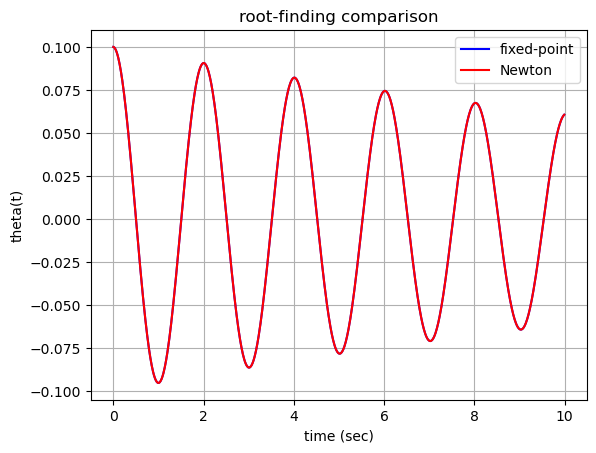

In [12]:
x0 = np.array([.1,0])
_x0 = x0
_h = 0.01
Tf = 10
x_hist1, t_hist1 = backward_euler_fixed_point(pendulum_dynamics, x0, Tf, _h)
x_hist2, t_hist2 = backward_euler_newton(pendulum_dynamics_wrapper, x0, Tf, _h)

plt.figure()
plt.plot(t_hist1, x_hist1[0,:],'b-',t_hist2, x_hist2[0,:],'r-')
plt.xlabel('time (sec)')
plt.ylabel('theta(t)')
plt.title('root-finding comparison')
plt.legend(['fixed-point','Newton'])
plt.grid(True)
plt.show()

รูปที่ 2.3 ผลการเปรียบเทียบการจำลองโดยวิธีจุดตรึงและวิธีนิวตัน

จากกราฟไม่สามารถสังเกตความแตกต่างได้โดยสายตา หากตรวจสอบจากค่าในแอเรย์ ณ จุดที่ความแตกต่างมากสุดพบว่ามีค่าน้อยระดับทศนิยม 6 ตำแหน่ง

In [13]:
max(abs(x_hist1[0,:]-x_hist2[0,:]))

2.2929798505670965e-06

**หมายเหตุ :** ข้อสังเกตจากผลการจำลองพลวัตลูกตุ้มโดยวิธีออยเลอร์ย้อนหลังในรูปที่ 2.3 คือการแกว่งของเอาต์พุตมีระดับลดลง แม้ว่าไม่มีแรงเสียดทานหรือค่าความหน่วงในระบบ เป็นลักษณะเด่นประการหนึ่งของวิธีออยเลอร์ย้อนหลัง ซึ่งอาจเป็นสิ่งที่พึงประสงค์ในงานจำลองบางประเภทที่ต้องการเสถียรภาพดี หากต้องการให้ผลการจำลองใกล้เคียงกับระบบเวลาต่อเนื่องมากขึ้น ทดลองลดค่าขั้นเวลาลง เช่น 0.001 วินาที ระดับการแกว่งจะคงที่มากขึ้น

แม้ว่าผลการจำลองจะไม่แตกต่างกันมาก แต่เมื่อเปรียบเทียบความเร็วในการลู่เข้าในแต่ละขั้นของวิธีทั้งสอง โดยตั้งพิกัดของค่าแตกต่างเท่ากันคือ 1e-8 พบว่าวิธีจุดตรึงมีจำนวนการวนซ้ำหลายรอบกว่าจะได้ตามพิกัดm

In [14]:
xn, e1 = backward_euler_step_fixed_point(pendulum_dynamics, x0, 0.1)
print(e1)

[0.09793658173053843, 0.009793658173053846, 0.009564124766684667, 0.0009564124766684723, 0.0009343853483241293, 9.343853483241571e-05, 9.128296581455142e-05, 9.128296581450979e-06, 8.917746787032166e-06, 8.917746786990532e-07, 8.712050176828967e-07, 8.712050177106523e-08, 8.511098474606182e-08, 8.511098478769519e-09]


ส่วนวิธีนิวตันมีการวนซ้ำเพียง 3 รอบเท่านั้น และยังได้ค่าแตกต่างต่ำกว่าพิกัดมาก

In [15]:
xn, e2 = backward_euler_step_newton(pendulum_dynamics_wrapper, x0, 0.1)
print(e2)

[0.09793658173053843, 3.7830087232931797e-06, 5.2874553670659e-15]


เมื่อพล็อตค่าความแตกต่างเทียบกับจำนวนรอบ จะได้ดังรูปที่  2.4

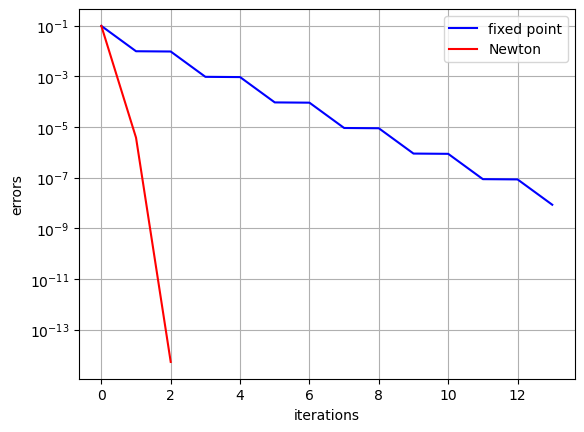

In [16]:
plt.figure()
plt.semilogy(e1,'b',e2,'r')
plt.xlabel('iterations')
plt.ylabel('errors')
plt.legend(['fixed point','Newton'])
plt.grid('True')
plt.show()

รูปที่ 2.4 เปรียบเทียบความเร็วในการลู่เข้าระหว่างวิธีจุดตรึงและวิธีนิวตัน

จากรูปที่ 2.4 จะเห็นว่าวิธีนิวตันมีสมรรถนะที่เหนือกว่าวิธีจุดตรึงอย่างเด่นชัด โดยจุดทศนิยมของแตกต่างลดลงในรูปของกำลังสองในขณะที่ค่าแตกต่างของวิธีจุดตรึงลดลงในรูปเชิงเส้น ทำให้วิธีนิวตันมักเป็นทางเลือกที่พึงประสงค์สำหรับการหาค่าราก อย่างไรก็ตาม ในกรณีที่โจทย์ปัญหามีตัวแปรจำนวนมาก การค่าผกผันของเมทริกซ์จาโคเบียนขนาดใหญ่ทำให้วิธีนิวตันมีความซับซ้อนในการคำนวณมากกว่าวิธีจุดตรึง

### 2.1.3 การหาค่าต่ำสุดของฟังก์ชันโดยวิธีหาค่าราก

จากสมการ (2.2) ในหัวข้อ 2.1.1 ได้กล่าวถึงเงื่อนไขจำเป็นของค่าต่ำสุดของฟังก์ชันมูลค่า คือต้องมีค่าอนุพันธ์เท่ากับศูนย์ 
ดังนั้นเราสามารถประยุกต์ใช้วิธีการหาค่ารากในการหาค่าต่ำสุดของฟังก์ชัน โดยพิจารณา $\nabla f(x) = \frac{\partial f(x)}{\partial x}$ 
และหาค่าของ $x$ ที่ทำให้ $\nabla f(x) = 0$ 

จากโจทย์ปัญหาการหาค่าต่ำสุด

$$
\underset{x}{min}f(x), \;\; f(x) : \mathbf{R}^n \rightarrow \mathbf{R} \tag{2.10}
$$

เมื่อดำเนินการตามขั้นตอนของวิธีนิวตัน จะได้ว่า

$$
\nabla f(x+\Delta x) \approx \Delta f(x) + \frac{\partial}{\partial x}(\nabla f(x))\Delta x = 0 \tag{2.11}
$$

นิยาม $\nabla^2 f(x) = \frac{\partial}{\partial x}(\nabla f(x))\Delta x$ แก้สมการ (2.11) เพื่อหาคำตอบ $\Delta x$

$$
\Delta x = - (\nabla^2 f(x))^{-1} \Delta f(x) \tag{2.12}
$$

ดังนั้นสามารถเขียนเค้าโครงอัลกอริทึมหาค่าต่ำสุดโดยวิธีนิวตันได้ดังนี้
* คาดเดาค่าเริ่มต้น $x$
* คำนวณขั้นการเปลี่ยนค่า $\Delta x$ จาก (2.12)
* ปรับค่า $x \leftarrow x + \Delta x$
* วนซ้ำจนลู่เข้า คือค่า $\nabla f(x)$ เข้าสู่ศูนย์ 

**หมายเหตุ :** ศัพท์ทางคณิตศาสตร์ที่ใช้เรียก $\nabla f(x)$ คือ เกรเดียนต์ (gradient) หรือจาโคเบียน (jacobian) 
สำหรับ $f(x)$ เป็นสเกลาร์หรือเวกเตอร์ และเรียก $\nabla^2 f(x)$ ว่า เฮสเชียน (hessian)


**ตัวอย่าง 2.3** ทดลองหาค่าต่ำสุดของฟังก์ชันในตัวอย่าง 2.1 

$$
f(x) = x^4 + x^3 - 2x^2 - 0.5x 
$$

เมื่อเลือกค่าเริ่มต้น $x$ แตกต่างกัน 

In [1]:
def f(x):
    return x**4 + x**3 -2*x**2 - 0.5*x   

เนื่องจาก $f(x)$ เป็นพังก์ชันพหุนามอย่างง่าย 
เราสามารถอนุพัทธ์ $\nabla f(x)$ และ $\nabla^2 f(x)$ และสร้างเป็นฟังก์ชันดังนี้

In [2]:
def df(x):
    return 4.0*x**3 +3.0*x**2 - 4.0*x -0.5

In [3]:
def d2f(x):
    return 12.0*x**2 + 6.0*x -4.0

สังเกตว่าในตัวอย่างมิติเดียวนี้ ค่า $\nabla f(x)$ และ $\nabla^2 f(x)$ เป็นสเกลาร์ 
ดังนั้นการคำนวณขั้นของ $x$ ใน (2.12) ไม่จำเป็นต้องแก้สมการเมทริกซ์ เขียนเป็นฟังก์ชันง่ายขึ้นดังนี้

In [4]:
def newton_step(x0):
    #xn = x0 - solve(d2f(x0),df(x0)) # general form (2.12)
    return x0 - df(x0)/d2f(x0)  # but df() and d2f() are scalar in this example

สมมุติว่าเลือกค่าเริ่มต้น $x = -1.9$ เขียนโค้ดเพื่อแสดงกราฟของฟังก์ชันและค่าเริ่มต้นได้ดังรูปที่ 2.5

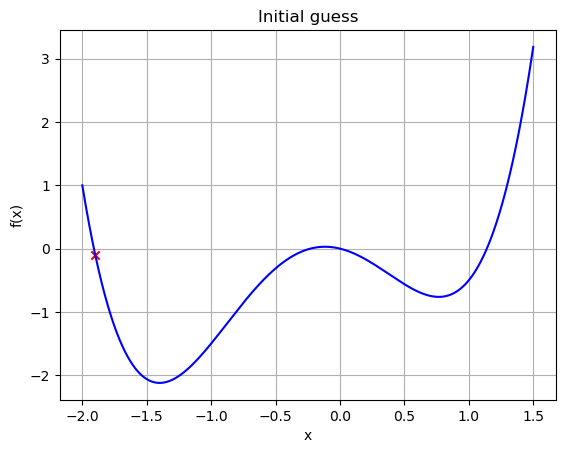

In [8]:
x = np.linspace(-2, 1.5, 1000)
xguess = [-1.9]
i = 0
plt.figure()
plt.plot(x, f(x),'b')
plt.scatter(xguess, f(xguess[0]),marker='x',color='r')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.title('Initial guess')
plt.show()

รูปที่ 2.5 การหาค่าต่ำสุดโดยวิธีนิวตันเมื่อเลือกค่าเริ่มต้น $x = -1.9$ 

ใช้โค้ดในเซลล์ด้านล่างนี้เพิ่อแสดงการปรับค่าของ $x$ ในแต่ละขั้นของวิธีนิวตัน โดยรันเซลล์ซ้ำตามต้องการจนกว่าจะได้ผลตามคาดหวัง 
ค่าของ $x$ ปัจจุบันจะเป็นกากบาทสีแดง ส่วนค่าก่อนหน้าจะเปลี่ยนเป็นสีเขียว พบว่าสามารถลู่เข้าสู่ค่าต่ำสุดวงกว้างได้ใน 2-3 ขั้นเท่านั้น 
ดังแสดงในรูปที่ 2.6 ซึ่งไม่ผิดไปจากความคาดหมายเพราะวิธีการนิวตันเปรียบได้กับการประมาณค่ารูปแบบกำลังสองกับฟังก์ชัน $f(x)$ 
ซึ่งใกล้เคียงกับส่วนโค้งของกราฟทางด้านซ้าย ทำให้ใช้เวลาในการลู่เข้าน้อย

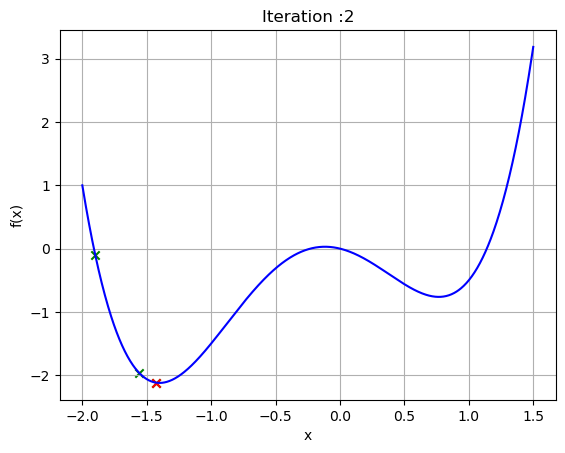

In [10]:
xnew = newton_step(xguess[-1])
i = i+1
xguess.append(xnew)
plt.figure()
plt.plot(x, f(x),'b')
xguess_array = np.array(xguess) # need to convert to array to pass as argument to f()
plt.scatter(xguess_array, f(xguess_array),marker='x',color='g')
plt.scatter(xguess_array[-1], f(xguess_array[-1]),marker='x',color='r')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.title('Iteration :'+str(i))
plt.show()

รูปที่ 2.6 การลู่เข้าสู่ค่าต่ำสุดจากค่าเริ่มต้น $x = -1.9$

## บรรณานุกรม

1. Z. Manchester et.al. 16-745 Optimal Control & Reinforcement Learning, Course materials, Carnegie Mellon University. 2024.

